In [1]:
# ------------------------------------------------------------
# Configuración Inicial del Entorno
# - Configura las rutas base del proyecto.
# - Verifica si el directorio `src` y sus subdirectorios existen.
# - Asegura que los módulos del proyecto sean accesibles.
# ------------------------------------------------------------

import sys
import os

# Establecer la ruta base del proyecto (un nivel hacia arriba desde el directorio actual)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Ruta hacia el directorio `src`, donde se almacenan los módulos del proyecto
SRC_PATH = os.path.join(BASE_DIR, "src")

# Agregar la ruta `src` a sys.path si no está ya presente
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)
    print(f"'src' agregado a sys.path correctamente: {SRC_PATH}")

# Mostrar todas las rutas actuales en sys.path (para confirmar la configuración)
print("Rutas actuales en sys.path:")
for path in sys.path:
    print(path)

# Verificar si el directorio `src` existe
print("\n¿Existe el directorio 'src'?")
print("SÍ" if os.path.exists(SRC_PATH) else "NO")

# Listar los archivos disponibles en el directorio `src`
print("\nArchivos en el directorio 'src':")
print(os.listdir(SRC_PATH))

# Ruta al subdirectorio `pdf_processing`, utilizado para procesar documentos PDF
PDF_PROCESSING_PATH = os.path.join(SRC_PATH, "pdf_processing")

# Verificar si el subdirectorio `pdf_processing` existe
print("\n¿Existe el subdirectorio 'pdf_processing'?")
print("SÍ" if os.path.exists(PDF_PROCESSING_PATH) else "NO")

# Listar los archivos dentro del subdirectorio `pdf_processing`
print("\nArchivos en 'pdf_processing':")
print(os.listdir(PDF_PROCESSING_PATH))

'src' agregado a sys.path correctamente: /Users/maximilianocruz/Documents/GitHub/practicos-rag/src
Rutas actuales en sys.path:
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python311.zip
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11/lib-dynload

/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11/site-packages
/Users/maximilianocruz/Documents/GitHub/practicos-rag/src

¿Existe el directorio 'src'?
SÍ

Archivos en el directorio 'src':
['retrievers', 'embedding', 'text_preprocessing', '__init__.py', 'pdf_processing', 'chunking', 'vector_store_client', 'evaluation', 'loaders']

¿Existe el subdirectorio 'pdf_processing'?
SÍ

Archivos en 'pdf_processing':
['__init__.py', '__pycache__', 'pdf_to_json.py']


In [2]:
# ------------------------------------------------------------
# Determinar la cantidad de páginas en cada archivo PDF
# ------------------------------------------------------------
import os
import pdfplumber

# Ruta al directorio con los archivos PDF
CAPITULOS_DIR = os.path.join(BASE_DIR, "data/capitulos")

# Obtener lista de archivos PDF
pdf_files = [f for f in os.listdir(CAPITULOS_DIR) if f.endswith(".pdf")]

# Lista para almacenar información sobre los PDFs
pdf_page_counts = []

# Inspeccionar cada archivo PDF
for pdf_file in pdf_files:
    pdf_path = os.path.join(CAPITULOS_DIR, pdf_file)
    try:
        with pdfplumber.open(pdf_path) as pdf:
            num_pages = len(pdf.pages)
            pdf_page_counts.append({"file_name": pdf_file, "page_count": num_pages})
            print(f"{pdf_file}: {num_pages} páginas")
    except Exception as e:
        print(f"Error al procesar {pdf_file}: {e}")

# Ordenar los archivos por cantidad de páginas
sorted_pdfs = sorted(pdf_page_counts, key=lambda x: x["page_count"])

# Mostrar los tres documentos con menor cantidad de páginas
print("\nTres documentos con menor cantidad de páginas:")
for pdf in sorted_pdfs[:3]:
    print(f"{pdf['file_name']}: {pdf['page_count']} páginas")

capitulo6.pdf: 110 páginas
capitulo15.pdf: 46 páginas
capitulo14.pdf: 38 páginas
capitulo7.pdf: 21 páginas
capitulo5.pdf: 53 páginas
capitulo16.pdf: 124 páginas
capitulo17.pdf: 66 páginas
capitulo4.pdf: 262 páginas
capitulo13.pdf: 20 páginas
capitulo12.pdf: 71 páginas
capitulo1.pdf: 4 páginas
capitulo3.pdf: 38 páginas
capitulo10.pdf: 76 páginas
capitulo11.pdf: 99 páginas
capitulo2.pdf: 78 páginas
capitulo20.pdf: 13 páginas
capitulo21.pdf: 44 páginas
capitulo22.pdf: 5 páginas
capitulo9.pdf: 115 páginas
capitulo8.pdf: 223 páginas
capitulo19.pdf: 4 páginas
capitulo18.pdf: 178 páginas

Tres documentos con menor cantidad de páginas:
capitulo1.pdf: 4 páginas
capitulo19.pdf: 4 páginas
capitulo22.pdf: 5 páginas


In [3]:
# ------------------------------------------------------------
# Importar y Validar la Función 'process_pdf_to_json'
# - Importa la función desde el módulo correspondiente.
# - Verifica que la función esté disponible y lista para usar.
# ------------------------------------------------------------

import importlib.util

# Ruta al archivo `pdf_to_json.py`
module_path = os.path.join(SRC_PATH, "pdf_processing", "pdf_to_json.py")

# Cargar el módulo dinámicamente
spec = importlib.util.spec_from_file_location("pdf_processing.pdf_to_json", module_path)
pdf_processing = importlib.util.module_from_spec(spec)
spec.loader.exec_module(pdf_processing)

# Verificar si la función `process_pdf_to_json` está disponible
if hasattr(pdf_processing, "process_pdf_to_json"):
    print("La función 'process_pdf_to_json' está disponible y lista para usar.")
else:
    print("Error: La función 'process_pdf_to_json' no está disponible.")

La función 'process_pdf_to_json' está disponible y lista para usar.


In [4]:
# ------------------------------------------------------------
# Procesar Archivos PDF a JSON
# - Lista los archivos PDF disponibles.
# - Usa 'process_pdf_to_json' para procesar y cargar los datos.
# - Verifica cuántos archivos se procesaron correctamente.
# ------------------------------------------------------------

import os
from pdf_processing import process_pdf_to_json  # Asegúrate de importar el módulo actualizado

# Ruta a la carpeta con los capítulos en PDF
CAPITULOS_DIR = os.path.join(BASE_DIR, "data/capitulos")

# Obtener lista de archivos PDF en la carpeta
pdf_files = [f for f in os.listdir(CAPITULOS_DIR) if f.endswith(".pdf")]
print(f"Archivos PDF encontrados en '{CAPITULOS_DIR}': {len(pdf_files)}")

# Lista para almacenar datos procesados
processed_pdfs = []

# Procesar cada archivo PDF
for pdf_file in pdf_files:
    pdf_path = os.path.join(CAPITULOS_DIR, pdf_file)
    print(f"\nProcesando archivo PDF: {pdf_file}")
    try:
        # Procesar el archivo PDF a JSON
        pdf_data = process_pdf_to_json(pdf_path)
        
        # Almacenar datos procesados
        processed_pdfs.append({
            "file_name": pdf_file,
            "data": pdf_data
        })
        
        # Validar que el JSON contenga tablas correctamente delimitadas
        total_tables = sum(
            1 for chapter in pdf_data["capitulos"]
            for article in chapter["articulos"]
            if "[TABLE START]" in article["contenido"] and "[TABLE END]" in article["contenido"]
        )
        print(f"Archivo procesado con éxito: {pdf_file} | Tablas detectadas: {total_tables}")
        
    except Exception as e:
        print(f"Error al procesar el archivo {pdf_file}: {e}")

# Mostrar resumen de archivos procesados
print(f"\nArchivos procesados exitosamente: {len(processed_pdfs)}")

Archivos PDF encontrados en '/Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos': 22

Procesando archivo PDF: capitulo6.pdf
Archivo procesado con éxito: capitulo6.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo15.pdf
Archivo procesado con éxito: capitulo15.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo14.pdf
Archivo procesado con éxito: capitulo14.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo7.pdf
Archivo procesado con éxito: capitulo7.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo5.pdf
Archivo procesado con éxito: capitulo5.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo16.pdf
Archivo procesado con éxito: capitulo16.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo17.pdf
Archivo procesado con éxito: capitulo17.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo4.pdf
Archivo procesado con éxito: capitulo4.pdf | Tablas detectadas: 0

Procesando archivo PDF: capitulo13.pdf
Archivo p

In [5]:
# ------------------------------------------------------------
# Verificar el contenido del JSON procesado para un archivo específico
# ------------------------------------------------------------
import json

# Seleccionar el archivo más corto (puede ser ajustado según necesidad)
target_file = "capitulo22.pdf"

# Buscar el archivo en la lista de PDFs procesados
target_pdf = next((pdf for pdf in processed_pdfs if pdf["file_name"] == target_file), None)

if target_pdf:
    file_name = target_pdf["file_name"]
    data = target_pdf["data"]
    
    print(f"\nVerificación del archivo: {file_name}")
    print(f"Estructura general del JSON: {list(data.keys())}")
    
    # Mostrar ejemplo del primer capítulo
    first_chapter = data['capitulos'][0]
    print(f"\nPrimer capítulo:")
    print(f"  Número: {first_chapter.get('numero', 'No disponible')}")
    print(f"  Título: {first_chapter.get('titulo', 'No disponible')}")
    
    # Mostrar ejemplo del primer artículo del capítulo
    first_article = first_chapter["articulos"][0]
    content_preview = first_article["contenido"][:2000] + "..." if len(first_article["contenido"]) > 500 else first_article["contenido"]
    print(f"\nPrimer artículo (truncado a 500 caracteres):")
    print(content_preview)
    
    # Verificar si el contenido tiene delimitadores de tabla
    if "[TABLE START]" in first_article["contenido"] and "[TABLE END]" in first_article["contenido"]:
        print("\nTablas detectadas en el contenido del primer artículo.")
    else:
        print("\nNo se detectaron tablas en el contenido del primer artículo.")
else:
    print(f"El archivo {target_file} no se encuentra entre los procesados.")


Verificación del archivo: capitulo22.pdf
Estructura general del JSON: ['capitulos']

Primer capítulo:
  Número: 1
  Título: Ejemplo de Título

Primer artículo (truncado a 500 caracteres):
CAP ÍTULO XX II 
 
Misceláneos  
 
 
Artículo 141 7 – (Resolución Conjunta SCS y SB  Nº 2/2024 ) 
Los ingredientes/productos que a continuación se listan deberán responder a las 
características que se establecen en cada caso:  
1. CLORURO DE POTASIO  
Identificación y pureza según lo establecido en JECFA, FCC y/o UE.  
Usos: como ingrediente para utilizarlo en reemplazo parcial o total del cloruro de sodio 
(NaCl) en todas las categorías de alimentos en cuya definición se establezca un límite 
máximo de contenido de sodio o como aditivo en los casos en que la normativa vigente así 
lo permita.  
 
2. ISOMALTO OLIGOSACÁRIDOS  
 
Con la denominación de Jarabe de isomalto -oligosacáridos o IMO jarabe, se entiende el 
producto obtenido mediante hidrólisis enzimática controlada del almidón de maíz, y que

In [6]:
# ------------------------------------------------------------
# Verificar existencia y contenido crudo de un PDF
# ------------------------------------------------------------
CAPITULOS_DIR = os.path.join(BASE_DIR, "data", "capitulos")
pdf_path = os.path.join(CAPITULOS_DIR, "capitulo22.pdf")

# Verificar si el archivo existe en la ruta
if os.path.exists(pdf_path):
    print(f"El archivo existe en: {pdf_path}")
    try:
        # Abrir el archivo PDF y extraer texto
        with pdfplumber.open(pdf_path) as pdf:
            raw_text = ""
            for page in pdf.pages:
                page_text = page.extract_text() if page.extract_text() else ""
                raw_text += page_text

        print("\nTexto crudo extraído (truncado a 1000 caracteres):")
        print(raw_text[:1000] + "..." if len(raw_text) > 1000 else raw_text)

    except Exception as e:
        print(f"Error al extraer texto del PDF: {e}")
else:
    print(f"El archivo no existe en la ruta: {pdf_path}")

# ------------------------------------------------------------
# Diagnóstico del preprocesamiento de tablas
# ------------------------------------------------------------
from text_preprocessing.text_processing_v2 import preprocess_text_v2

# Extraer texto crudo del primer capítulo procesado (del JSON generado)
raw_text_from_json = processed_pdfs[-1]["data"]["capitulos"][0]["articulos"][0]["contenido"]

# Comparar texto crudo original con el texto del JSON
print("\nDiagnóstico: Comparando texto crudo original y texto JSON...")
if raw_text.strip() == raw_text_from_json.strip():
    print("El texto crudo original y el texto del JSON coinciden.")
else:
    print("El texto crudo original y el texto del JSON NO coinciden.")

# Preprocesar el texto directamente desde el archivo crudo
preprocessed_text = preprocess_text_v2(raw_text)

# Mostrar el texto preprocesado (primeros 1000 caracteres)
print("\nTexto preprocesado (truncado a 1000 caracteres):")
print(preprocessed_text[:1000] + "..." if len(preprocessed_text) > 1000 else preprocessed_text)

# Verificar presencia de delimitadores de tablas
if "[TABLE START]" in preprocessed_text and "[TABLE END]" in preprocessed_text:
    print("\nTablas detectadas correctamente en el texto preprocesado.")
else:
    print("\nNo se detectaron tablas en el texto preprocesado.")

El archivo existe en: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo22.pdf

Texto crudo extraído (truncado a 1000 caracteres):
CAPÍTULO XXII
Misceláneos
Artículo 1417 – (Resolución Conjunta SCS y SB Nº 2/2024)
Los ingredientes/productos que a continuación se listan deberán responder a las
características que se establecen en cada caso:
1. CLORURO DE POTASIO
Identificación y pureza según lo establecido en JECFA, FCC y/o UE.
Usos: como ingrediente para utilizarlo en reemplazo parcial o total del cloruro de sodio
(NaCl) en todas las categorías de alimentos en cuya definición se establezca un límite
máximo de contenido de sodio o como aditivo en los casos en que la normativa vigente así
lo permita.
2. ISOMALTO OLIGOSACÁRIDOS
Con la denominación de Jarabe de isomalto-oligosacáridos o IMO jarabe, se entiende el
producto obtenido mediante hidrólisis enzimática controlada del almidón de maíz, y que
consiste principalmente de oligómeros de isomaltosa, panosa, isom

In [7]:
# ------------------------------------------------------------
# Extraer y validar texto crudo de páginas específicas del capítulo 19
# ------------------------------------------------------------
import pdfplumber
from text_preprocessing.text_processing_v2 import preprocess_text_v2

# Ruta del archivo PDF del capítulo 19
capitulo_19_path = os.path.join(CAPITULOS_DIR, "capitulo19.pdf")

# Páginas a inspeccionar
pages_to_check = [1, 2, 3]

try:
    with pdfplumber.open(capitulo_19_path) as pdf:
        print(f"Archivo: capitulo19.pdf\n")
        for page_number in pages_to_check:
            # Extraer texto crudo de la página
            page = pdf.pages[page_number - 1]
            raw_text = page.extract_text()
            
            if raw_text:
                # Preprocesar el texto extraído
                preprocessed_text = preprocess_text_v2(raw_text)

                # Mostrar texto crudo
                print(f"\nTexto crudo de la página {page_number}:\n{'-'*50}")
                print(raw_text[:1000] + "..." if len(raw_text) > 1000 else raw_text)

                # Mostrar texto preprocesado
                print(f"\nTexto preprocesado de la página {page_number}:\n{'-'*50}")
                print(preprocessed_text[:1000] + "..." if len(preprocessed_text) > 1000 else preprocessed_text)

                # Validar tablas en el texto preprocesado
                if "[TABLE START]" in preprocessed_text and "[TABLE END]" in preprocessed_text:
                    print(f"\nTablas detectadas correctamente en la página {page_number}.")
                else:
                    print(f"\nNo se detectaron tablas en la página {page_number}.")
            else:
                print(f"\nAdvertencia: No se pudo extraer texto de la página {page_number}.")
except Exception as e:
    print(f"Error al procesar el archivo capitulo19.pdf: {e}")

Archivo: capitulo19.pdf


Texto crudo de la página 1:
--------------------------------------------------
CAPÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTEÍNICOS
Artículo 1407 - (Resolución Conjunta RESFC-2018-2-APN-SRYGS#MSYDS
Nº2/2018)
Harinas Proteínicas de origen vegetal: son los productos de la molienda de semillas limpias,
sanas, enteras, parcial o totalmente decorticadas, previstas en el presente Código, que han
sido sometidas o no a procesos de remoción parcial o prácticamente total del aceite que
contienen.
Su granulometría responderá a valores establecidos para cada caso en el presente Código.
La Harina de Soja o Soya es la obtenida a partir de semillas de Glycine Max (L) Merril.
Los diversos tipos de harina de soja que se consideran responderán a las siguientes
características:
Harina de soja
Con toda la grasa Con bajo contenido de desgrasada
grasa
Por ciento
Humedad 100-105°C máx 9 9 9
Proteína (N x 6,25) mín 35 45 >50 y <65
Grasa (extr etéreo) mín 18 4,5-9 máx 

In [8]:
# Importar el módulo actualizado
from text_preprocessing.table_validation import validate_tables_in_pdf, inspect_tables_in_pdf

# Validar tablas en capítulos seleccionados
print("\nValidación de tablas en capítulo 19:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo19.pdf"),
    pages_with_tables=[1, 2, 3],
    pages_without_tables=[4]
)

print("\nValidación de tablas en capítulo 22:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo22.pdf"),
    pages_with_tables=[3, 4],
    pages_without_tables=[1, 2]
)

print("\nValidación de tablas en capítulo 13:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo13.pdf"),
    pages_with_tables=[6, 7, 9, 12],
    pages_without_tables=[4, 5, 10]
)

# Inspeccionar tablas con validación más detallada en capítulos específicos
print("\nInspección detallada de tablas en capítulo 19:")
inspect_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo19.pdf"),
    pages=[1, 2, 3, 4]
)

print("\nInspección detallada de tablas en capítulo 22:")
inspect_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo22.pdf"),
    pages=[3, 4]
)

print("\nInspección detallada de tablas en capítulo 13:")
inspect_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo13.pdf"),
    pages=[6, 7, 9, 12]
)


Validación de tablas en capítulo 19:
Página 1 (con tablas: True): Correcto
Página 2 (con tablas: True): Correcto
Página 3 (con tablas: True): Correcto
Página 4 (con tablas: False): Error - Se detectaron tablas

Validación de tablas en capítulo 22:
Página 3 (con tablas: True): Correcto
Página 4 (con tablas: True): Correcto
Página 1 (con tablas: False): Error - Se detectaron tablas
Página 2 (con tablas: False): Error - Se detectaron tablas

Validación de tablas en capítulo 13:
Página 6 (con tablas: True): Correcto
Página 7 (con tablas: True): Correcto
Página 9 (con tablas: True): Correcto
Página 12 (con tablas: True): Correcto
Página 4 (con tablas: False): Error - Se detectaron tablas
Página 5 (con tablas: False): Error - Se detectaron tablas
Página 10 (con tablas: False): Error - Se detectaron tablas

Inspección detallada de tablas en capítulo 19:

Página 1 (Texto Crudo):
CAPÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTEÍNICOS
Artículo 1407 - (Resolución Conjunta RESFC-201

# Preprocesar Archivos JSON

In [9]:
# Paso: Preprocesar el texto utilizando text_processing_v2
from text_preprocessing.text_processing_v2 import preprocess_text_v2

# Lista para almacenar datos preprocesados
preprocessed_data = []

# Preprocesar el contenido de los PDFs procesados
for pdf in processed_pdfs:
    file_name = pdf["file_name"]
    try:
        # Verificar si el texto crudo está disponible en el JSON
        capitulos = pdf["data"].get("capitulos", [])
        if not capitulos or not capitulos[0].get("articulos"):
            print(f"Archivo {file_name}: No contiene capítulos o artículos válidos. Saltando.")
            continue

        # Obtener texto crudo del JSON generado
        raw_text = capitulos[0]["articulos"][0].get("contenido", "")
        if not raw_text.strip():
            print(f"Archivo {file_name}: El contenido está vacío o solo contiene espacios. Saltando.")
            continue

        # Detectar tablas en el texto antes del preprocesamiento
        print(f"Detectando tablas en {file_name}...")
        contains_table = "[TABLE START]" in raw_text
        if contains_table:
            print(f"Archivo {file_name}: Se detectaron tablas en el texto crudo.")

        # Preprocesar el texto
        preprocessed_text = preprocess_text_v2(raw_text)
        preprocessed_data.append({
            "file_name": file_name,
            "preprocessed_text": preprocessed_text
        })
        print(f"Archivo {file_name} preprocesado con éxito.")
    except Exception as e:
        print(f"Error al preprocesar el archivo {file_name}: {e}")

# Mostrar un ejemplo de texto preprocesado
if preprocessed_data:
    print("\nEjemplo de texto preprocesado:")
    print(f"Archivo: {preprocessed_data[0]['file_name']}")
    print(preprocessed_data[0]["preprocessed_text"][:500])  # Mostrar primeros 500 caracteres

Detectando tablas en capitulo6.pdf...
Archivo capitulo6.pdf preprocesado con éxito.
Detectando tablas en capitulo15.pdf...
Archivo capitulo15.pdf preprocesado con éxito.
Detectando tablas en capitulo14.pdf...
Archivo capitulo14.pdf preprocesado con éxito.
Detectando tablas en capitulo7.pdf...
Archivo capitulo7.pdf preprocesado con éxito.
Detectando tablas en capitulo5.pdf...
Archivo capitulo5.pdf preprocesado con éxito.
Detectando tablas en capitulo16.pdf...
Archivo capitulo16.pdf preprocesado con éxito.
Detectando tablas en capitulo17.pdf...
Archivo capitulo17.pdf preprocesado con éxito.
Detectando tablas en capitulo4.pdf...
Archivo capitulo4.pdf preprocesado con éxito.
Detectando tablas en capitulo13.pdf...
Archivo capitulo13.pdf preprocesado con éxito.
Detectando tablas en capitulo12.pdf...
Archivo capitulo12.pdf preprocesado con éxito.
Detectando tablas en capitulo1.pdf...
Archivo capitulo1.pdf preprocesado con éxito.
Detectando tablas en capitulo3.pdf...
Archivo capitulo3.pdf prep

In [10]:
# Verificar la calidad de los textos preprocesados
print("Verificaciones sobre textos preprocesados:")

# Lista para estadísticas
text_lengths = []
issues_log = []  # Registro de problemas detectados

# Realizar verificaciones en los datos preprocesados
for data in preprocessed_data:
    file_name = data["file_name"]
    preprocessed_text = data["preprocessed_text"]

    # Agregar la longitud del texto a las estadísticas
    text_lengths.append(len(preprocessed_text))

    # Detección de problemas en el texto
    issues = []
    if "\n\n" in preprocessed_text:
        issues.append("Múltiples saltos de línea detectados")
    if not preprocessed_text.strip():
        issues.append("Texto vacío tras preprocesamiento")
    if "[TABLE START]" in preprocessed_text and "[TABLE END]" not in preprocessed_text:
        issues.append("Inicio de tabla sin cierre")
    if "[TABLE END]" in preprocessed_text and "[TABLE START]" not in preprocessed_text:
        issues.append("Cierre de tabla sin inicio")

    # Registrar problemas detectados
    if issues:
        issues_log.append({"file_name": file_name, "issues": issues})
        print(f"Advertencia/Problema en {file_name}: {', '.join(issues)}")

# Mostrar estadísticas descriptivas
import numpy as np

if text_lengths:
    print("\nEstadísticas de los textos preprocesados:")
    print(f"Total de documentos procesados: {len(text_lengths)}")
    print(f"Longitud promedio: {np.mean(text_lengths):.2f} caracteres")
    print(f"Longitud mínima: {np.min(text_lengths)} caracteres")
    print(f"Longitud máxima: {np.max(text_lengths)} caracteres")

# Registrar problemas detectados en un archivo
if issues_log:
    import json
    issues_log_path = os.path.join(BASE_DIR, "issues_log.json")
    with open(issues_log_path, "w", encoding="utf-8") as log_file:
        json.dump(issues_log, log_file, indent=4, ensure_ascii=False)
    print(f"\nLos problemas detectados se han registrado en '{issues_log_path}'.")
else:
    print("\nNo se detectaron problemas significativos en los textos preprocesados.")

Verificaciones sobre textos preprocesados:
Advertencia/Problema en capitulo6.pdf: Múltiples saltos de línea detectados
Advertencia/Problema en capitulo11.pdf: Múltiples saltos de línea detectados
Advertencia/Problema en capitulo9.pdf: Múltiples saltos de línea detectados

Estadísticas de los textos preprocesados:
Total de documentos procesados: 22
Longitud promedio: 209664.73 caracteres
Longitud mínima: 9969 caracteres
Longitud máxima: 665546 caracteres

Los problemas detectados se han registrado en '/Users/maximilianocruz/Documents/GitHub/practicos-rag/issues_log.json'.


In [11]:
import json
import os

# Ruta del archivo de registro
issues_log_path = os.path.join(BASE_DIR, "issues_log.json")

# Cargar el archivo de registro
try:
    with open(issues_log_path, "r", encoding="utf-8") as log_file:
        issues_log = json.load(log_file)
except Exception as e:
    print(f"Error al cargar el archivo de registro: {e}")
    issues_log = []

# Inspeccionar los capítulos problemáticos
problematic_chapters = ["capitulo6.pdf", "capitulo11.pdf", "capitulo9.pdf"]

for chapter in problematic_chapters:
    print(f"\nInspección del capítulo: {chapter}")
    
    # Buscar problemas en el registro
    chapter_issues = next((entry for entry in issues_log if entry["file_name"] == chapter), None)
    if chapter_issues:
        print(f"Problemas detectados: {', '.join(chapter_issues['issues'])}")
    else:
        print("No se encontraron detalles en el registro.")
    
    # Extraer y mostrar un ejemplo del texto preprocesado
    matching_data = next(
        (data for data in preprocessed_data if data["file_name"] == chapter), None
    )
    if matching_data:
        print("\nEjemplo del texto preprocesado:")
        print(matching_data["preprocessed_text"][:1000])  # Mostrar primeros 1000 caracteres
    else:
        print("No se encontró el texto preprocesado para este capítulo.")


Inspección del capítulo: capitulo6.pdf
Problemas detectados: Múltiples saltos de línea detectados

Ejemplo del texto preprocesado:
15
CAPÍTULO VI
ALIMENTOS CÁRNEOS Y AFINES
CARNES DE CONSUMO FRESCAS Y ENVASADAS
[TABLE START]
Artículo 247 (Resolución Conjunta SPReI y SAV N 12 -E/2017)
[TABLE END]
Con la denominación genérica de carne, se entiende la parte comestible de los músculos de vacunos, bubalinos, porcinos, ovinos, caprinos, llamas, conejos domésticos, nutrias de criadero, pollos, pollas, gallos, gallinas, pavitos, pavitas, pavos, pavas, pat os domésticos, gansos domésticos y codornices, declarados aptos para la alimentación humana por la inspección veterinaria oficial antes y después de la faena.
Con la misma definición se incluyen a los animales silvestres de caza o criados en cautiverio, pescados, crustáceos, moluscos y otras especies comestibles.
Por extensión se considera carne al diafragma y músculos de la lengua, no así los músculos de sostén del aparato hioideo, el coraz

In [12]:
# Verificar que hay datos preprocesados
if preprocessed_data:
    # Identificar los documentos más corto y más largo
    shortest_doc = min(preprocessed_data, key=lambda x: len(x["preprocessed_text"]))
    longest_doc = max(preprocessed_data, key=lambda x: len(x["preprocessed_text"]))

    # Mostrar ejemplos de los textos
    print("Ejemplo del documento más corto:")
    print(f"Archivo: {shortest_doc['file_name']}")
    print(shortest_doc["preprocessed_text"][:1000] + "..." if len(shortest_doc["preprocessed_text"]) > 1000 else shortest_doc["preprocessed_text"])

    print("\nEjemplo del documento más largo:")
    print(f"Archivo: {longest_doc['file_name']}")
    print(longest_doc["preprocessed_text"][:1000] + "..." if len(longest_doc["preprocessed_text"]) > 1000 else longest_doc["preprocessed_text"])
else:
    print("No hay datos preprocesados para analizar.")

Ejemplo del documento más corto:
Archivo: capitulo19.pdf
CAP ÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTE ÍNICOS
[TABLE START]
Artículo 1407 - (Resolución Conjunta RESFC -2018 -2-APN-SRYGS MSYDS
[TABLE END]
Nº2/2018 )
Harinas Proteínicas de origen vegetal: son los productos de la molienda de semillas limpias, sanas, enteras , parcial o totalmente decorticadas, prev istas en el presente Código, que han sido sometidas o no a procesos de remoción parcial o prácticamente tota l del aceite que contienen.
Su granulometría responderá a valores establecidos para cada caso en el present e Código.
La Harina de Soja o Soya es la obtenida a partir de semillas de Glycine Max (L) Merril.
Los diversos tipos de harina de soja que se cons ideran responderán a las siguientes características:
Harina de soja
[POSSIBLE TABLE START]
Con toda la grasa  Con bajo contenido de grasa desgrasada
[POSSIBLE TABLE END]
Por ciento
[TABLE START]
[POSSIBLE TABLE START]
Humedad 100-105C máx  9 9 9
[POSSIB

In [13]:
# Inspección del documento más corto
print("\nInspección del documento más corto:")
print(f"Archivo: {shortest_doc['file_name']}")
shortest_preview = shortest_doc["preprocessed_text"][:1000]  # Limitar a 1000 caracteres para inspección
print(shortest_preview + "..." if len(shortest_doc["preprocessed_text"]) > 1000 else shortest_preview)

# Detectar tablas en el texto preprocesado más corto
if "[TABLE START]" in shortest_doc["preprocessed_text"]:
    print("\nTablas detectadas en el documento más corto.")
else:
    print("\nNo se detectaron tablas en el documento más corto.")

# Inspección del documento más largo
print("\nInspección del documento más largo:")
print(f"Archivo: {longest_doc['file_name']}")
longest_preview = longest_doc["preprocessed_text"][:1000]  # Limitar a 1000 caracteres para inspección
print(longest_preview + "..." if len(longest_doc["preprocessed_text"]) > 1000 else longest_preview)

# Detectar tablas en el texto preprocesado más largo
if "[TABLE START]" in longest_doc["preprocessed_text"]:
    print("\nTablas detectadas en el documento más largo.")
else:
    print("\nNo se detectaron tablas en el documento más largo.")


Inspección del documento más corto:
Archivo: capitulo19.pdf
CAP ÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTE ÍNICOS
[TABLE START]
Artículo 1407 - (Resolución Conjunta RESFC -2018 -2-APN-SRYGS MSYDS
[TABLE END]
Nº2/2018 )
Harinas Proteínicas de origen vegetal: son los productos de la molienda de semillas limpias, sanas, enteras , parcial o totalmente decorticadas, prev istas en el presente Código, que han sido sometidas o no a procesos de remoción parcial o prácticamente tota l del aceite que contienen.
Su granulometría responderá a valores establecidos para cada caso en el present e Código.
La Harina de Soja o Soya es la obtenida a partir de semillas de Glycine Max (L) Merril.
Los diversos tipos de harina de soja que se cons ideran responderán a las siguientes características:
Harina de soja
[POSSIBLE TABLE START]
Con toda la grasa  Con bajo contenido de grasa desgrasada
[POSSIBLE TABLE END]
Por ciento
[TABLE START]
[POSSIBLE TABLE START]
Humedad 100-105C máx  9 9 9
[PO

In [20]:
from chunking.chunking_optimized import optimized_chunking  # Importar chunking
import pandas as pd
import json

print("Iniciando chunking y validación...")

# Lista para almacenar estadísticas de chunks
chunk_statistics = []

# Lista para almacenar todos los chunks
all_chunks = []

# Procesar documentos completos
for data in preprocessed_data:  # Procesar todos los documentos
    file_name = data["file_name"]
    preprocessed_text = data["preprocessed_text"]

    try:
        # Generar chunks con los parámetros optimizados
        chunks = optimized_chunking(
            preprocessed_text, 
            file_name=file_name, 
            max_chunk_size=250, 
            overlap=50, 
            min_chunk_size=20
        )
        
        # Guardar los chunks en la estructura all_chunks
        all_chunks.append({
            "file_name": file_name,
            "chunks": chunks
        })
        
        # Calcular estadísticas
        narrative_chunks = [c for c in chunks if c["type"] == "narrative"]
        table_chunks = [c for c in chunks if c["type"] == "table"]
        
        chunk_statistics.append({
            "file_name": file_name,
            "total_chunks": len(chunks),
            "narrative_chunks": len(narrative_chunks),
            "table_chunks": len(table_chunks),
            "avg_chunk_size": sum(len(c["content"]) for c in chunks) / len(chunks) if chunks else 0,
            "max_chunk_size": max(len(c["content"]) for c in chunks) if chunks else 0,
            "min_chunk_size": min(len(c["content"]) for c in chunks) if chunks else 0,
        })
        print(f"Chunks generados para {file_name}: {len(chunks)} (Narrativas: {len(narrative_chunks)}, Tablas: {len(table_chunks)})")
    except Exception as e:
        print(f"Error durante el chunking de {file_name}: {e}")

# Guardar los chunks generados en un archivo JSON para uso posterior
with open("all_chunks.json", "w", encoding="utf-8") as f:
    json.dump(all_chunks, f, ensure_ascii=False, indent=4)

# Generar un reporte de validación
df_stats = pd.DataFrame(chunk_statistics)

# Mostrar estadísticas con pandas
if not df_stats.empty:
    print("\nEstadísticas de Chunking:")
    print(df_stats)
else:
    print("No se generaron estadísticas, verificar datos preprocesados o el módulo de chunking.")

# Resumen de estadísticas
print("\nResumen de estadísticas:")
if not df_stats.empty:
    summary = df_stats.describe(include='all')
    print(summary)
else:
    print("No se generaron estadísticas, verificar datos preprocesados o el módulo de chunking.")

Iniciando chunking y validación...
Chunks generados para capitulo6.pdf: 435 (Narrativas: 84, Tablas: 351)
Chunks generados para capitulo15.pdf: 269 (Narrativas: 77, Tablas: 192)
Chunks generados para capitulo14.pdf: 155 (Narrativas: 34, Tablas: 121)
Chunks generados para capitulo7.pdf: 114 (Narrativas: 25, Tablas: 89)
Chunks generados para capitulo5.pdf: 240 (Narrativas: 55, Tablas: 185)
Chunks generados para capitulo16.pdf: 884 (Narrativas: 326, Tablas: 558)
Chunks generados para capitulo17.pdf: 258 (Narrativas: 71, Tablas: 187)
Chunks generados para capitulo4.pdf: 676 (Narrativas: 137, Tablas: 539)
Chunks generados para capitulo13.pdf: 93 (Narrativas: 18, Tablas: 75)
Chunks generados para capitulo12.pdf: 329 (Narrativas: 72, Tablas: 257)
Chunks generados para capitulo1.pdf: 10 (Narrativas: 0, Tablas: 10)
Chunks generados para capitulo3.pdf: 164 (Narrativas: 54, Tablas: 110)
Chunks generados para capitulo10.pdf: 368 (Narrativas: 101, Tablas: 267)
Chunks generados para capitulo11.pdf: 


Resumen General de Chunks:
- Total de Chunks: 8376
- Promedio de Tamaño de Chunks: 398.0250159207863
- Máximo Tamaño de Chunk: 26943
- Mínimo Tamaño de Chunk: 20
- Total de Narrativas: 2269
- Total de Tablas: 6107


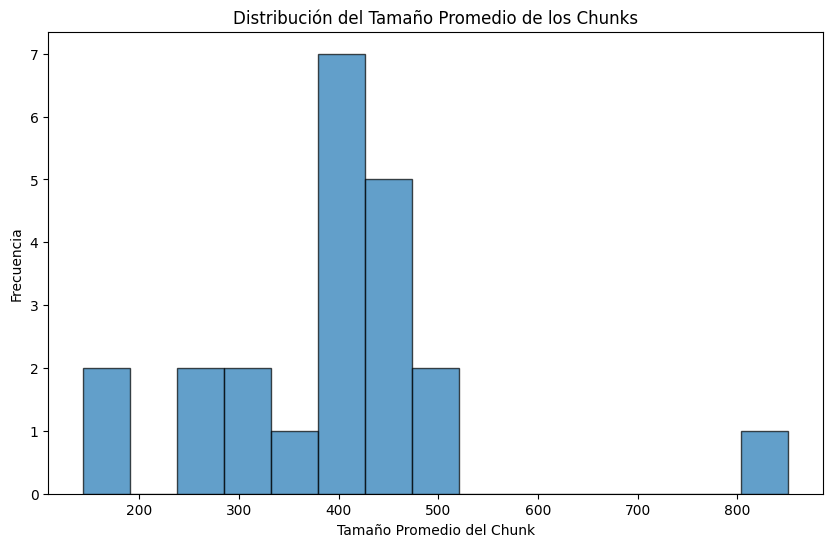

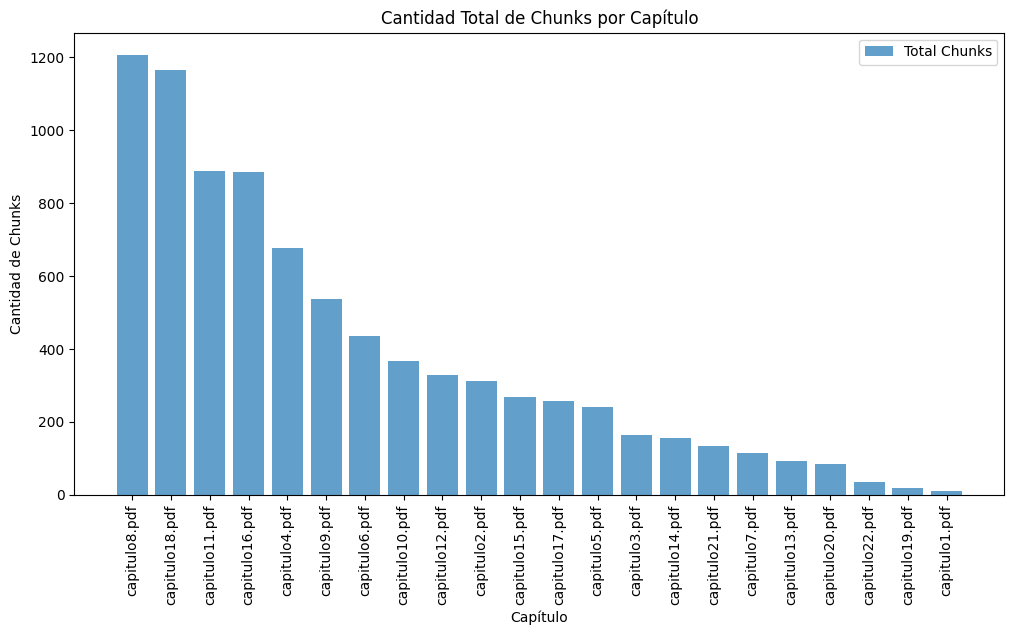

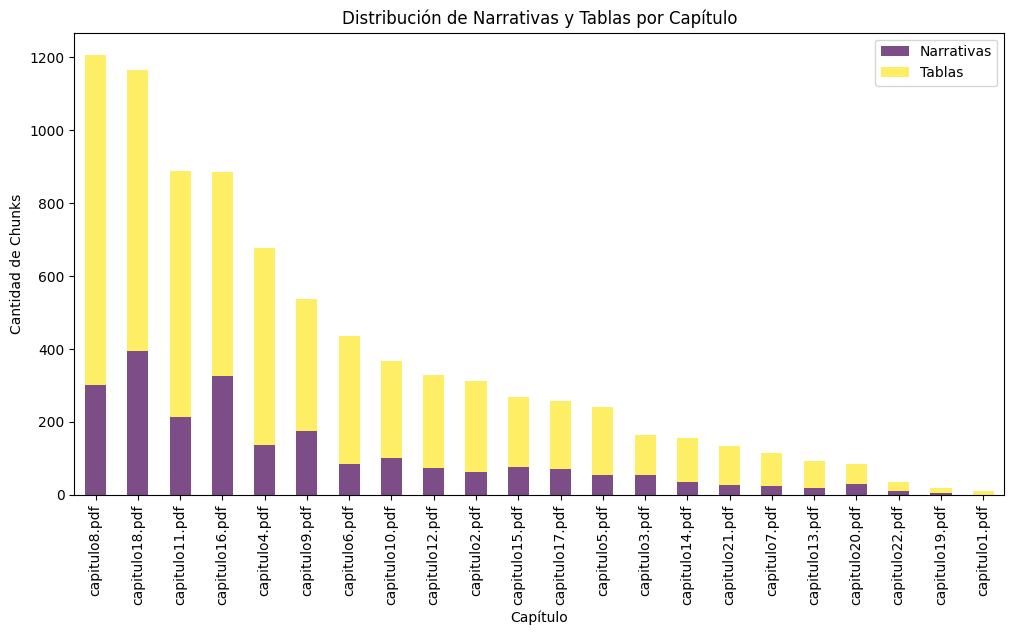

/var/folders/qj/yqc94zw15qv8yjh5dzsv5w_80000gn/T/ipykernel_2350/1492723444.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([narrative_sizes, table_sizes], labels=["Narrativas", "Tablas"])


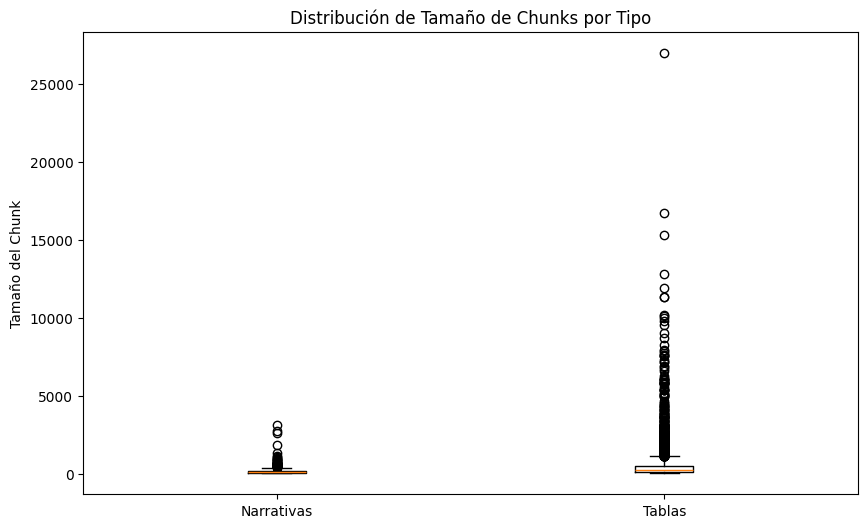

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos ya procesados
df_chunks = pd.DataFrame(chunk_statistics)

# Estadísticas Generales
chunk_summary = {
    "Total de Chunks": df_chunks["total_chunks"].sum(),
    "Promedio de Tamaño de Chunks": df_chunks["avg_chunk_size"].mean(),
    "Máximo Tamaño de Chunk": df_chunks["max_chunk_size"].max(),
    "Mínimo Tamaño de Chunk": df_chunks["min_chunk_size"].min(),
    "Total de Narrativas": df_chunks["narrative_chunks"].sum(),
    "Total de Tablas": df_chunks["table_chunks"].sum(),
}
print("\nResumen General de Chunks:")
for k, v in chunk_summary.items():
    print(f"- {k}: {v}")

# Histograma del tamaño de los chunks
plt.figure(figsize=(10, 6))
plt.hist(df_chunks["avg_chunk_size"], bins=15, alpha=0.7, edgecolor="black")
plt.title("Distribución del Tamaño Promedio de los Chunks")
plt.xlabel("Tamaño Promedio del Chunk")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras: Chunks por capítulo
df_chunks.sort_values("total_chunks", ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
plt.bar(df_chunks["file_name"], df_chunks["total_chunks"], alpha=0.7, label="Total Chunks")
plt.title("Cantidad Total de Chunks por Capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de Chunks")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Gráfico de barras apiladas: Narrativas vs Tablas por capítulo
df_chunks.set_index("file_name", inplace=True)
df_chunks[["narrative_chunks", "table_chunks"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), alpha=0.7, colormap="viridis"
)
plt.title("Distribución de Narrativas y Tablas por Capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de Chunks")
plt.xticks(rotation=90)
plt.legend(["Narrativas", "Tablas"])
plt.show()

# Boxplot: Tamaño de chunks por tipo
narrative_sizes = [
    len(c["content"])
    for data in preprocessed_data
    for c in optimized_chunking(data["preprocessed_text"], data["file_name"])
    if c["type"] == "narrative"
]
table_sizes = [
    len(c["content"])
    for data in preprocessed_data
    for c in optimized_chunking(data["preprocessed_text"], data["file_name"])
    if c["type"] == "table"
]

plt.figure(figsize=(10, 6))
plt.boxplot([narrative_sizes, table_sizes], labels=["Narrativas", "Tablas"])
plt.title("Distribución de Tamaño de Chunks por Tipo")
plt.ylabel("Tamaño del Chunk")
plt.show()


Capítulos con chunks muy grandes (outliers):
         file_name  max_chunk_size
0    capitulo6.pdf           16714
1   capitulo15.pdf            5803
2   capitulo14.pdf            5785
6   capitulo17.pdf            6038
7    capitulo4.pdf           26943
9   capitulo12.pdf            7738
11   capitulo3.pdf            5024
14   capitulo2.pdf            7585
18   capitulo9.pdf            9789
19   capitulo8.pdf            6235
21  capitulo18.pdf           15284

Resumen por capítulo:
         file_name  total_chunks  avg_chunk_size  max_chunk_size  \
0    capitulo1.pdf            10      405.100000             989   
1   capitulo10.pdf           368      423.271739            4303   
2   capitulo11.pdf           887      144.058625            1068   
3   capitulo12.pdf           329      446.382979            7738   
4   capitulo13.pdf            93      452.215054            3855   
5   capitulo14.pdf           155      460.903226            5785   
6   capitulo15.pdf           269   

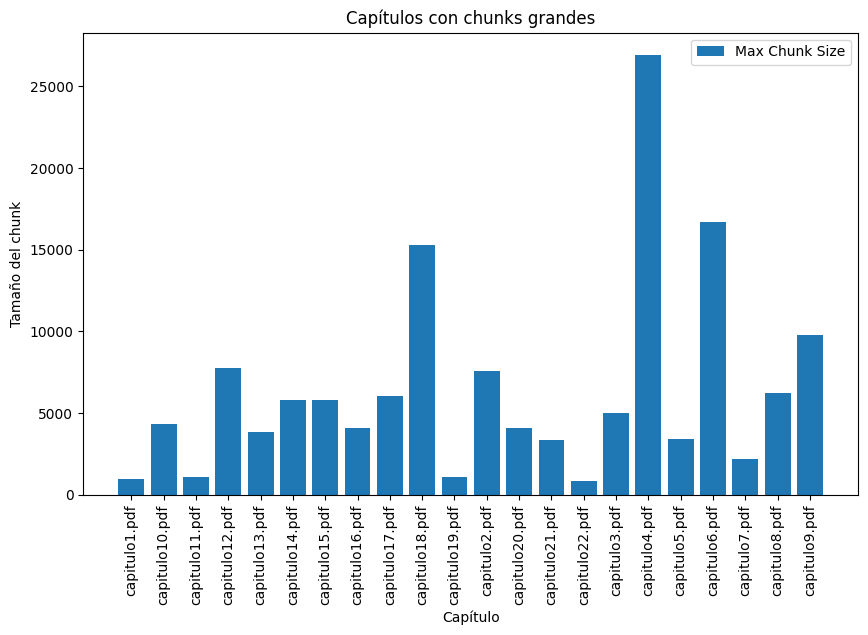

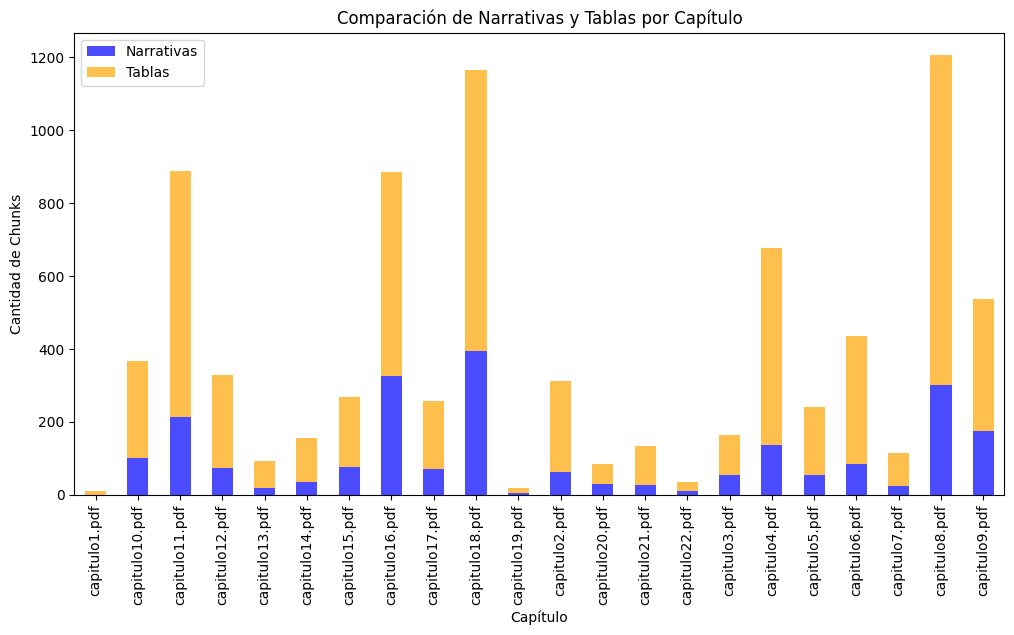

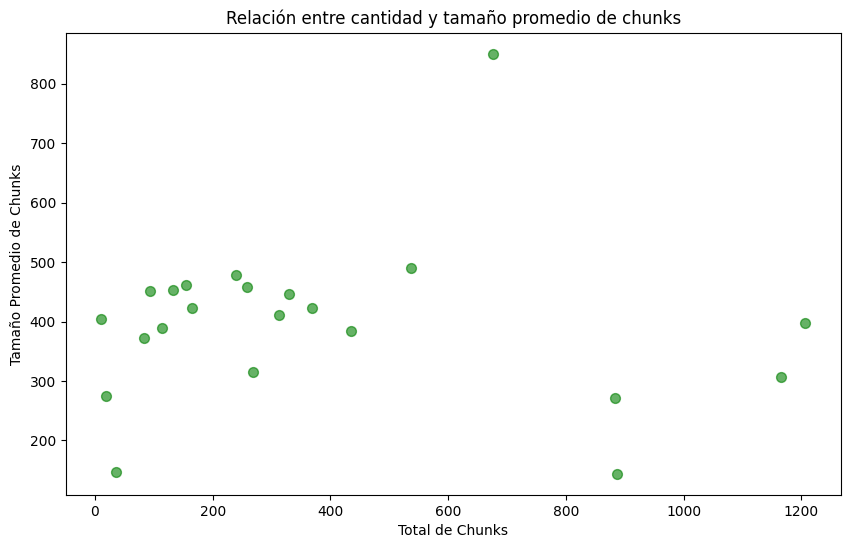

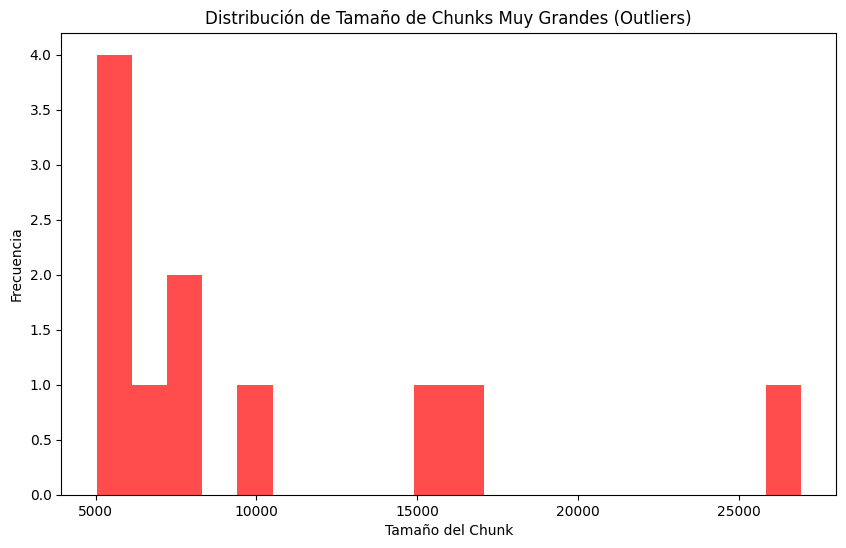

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame a partir de las estadísticas de chunks
df_chunks = pd.DataFrame(chunk_statistics)

# Inspección de Outliers
outlier_threshold = 5000
df_outliers = df_chunks[df_chunks['max_chunk_size'] > outlier_threshold]
print("\nCapítulos con chunks muy grandes (outliers):")
print(df_outliers[['file_name', 'max_chunk_size']])

# Métricas por capítulo
chapter_summary = df_chunks.groupby('file_name').agg(
    total_chunks=('total_chunks', 'sum'),
    avg_chunk_size=('avg_chunk_size', 'mean'),
    max_chunk_size=('max_chunk_size', 'max'),
    min_chunk_size=('min_chunk_size', 'min'),
    total_narratives=('narrative_chunks', 'sum'),
    total_tables=('table_chunks', 'sum')
).reset_index()

print("\nResumen por capítulo:")
print(chapter_summary)

# Visualización 1: Distribución de chunks grandes por capítulo
plt.figure(figsize=(10, 6))
plt.bar(
    chapter_summary['file_name'],
    chapter_summary['max_chunk_size'],
    label='Max Chunk Size'
)
plt.title("Capítulos con chunks grandes")
plt.xlabel("Capítulo")
plt.ylabel("Tamaño del chunk")
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Visualización 2: Comparación de narrativas y tablas por capítulo
chapter_summary[['total_narratives', 'total_tables']].plot(
    kind='bar', stacked=True, figsize=(12, 6), alpha=0.7, color=['blue', 'orange']
)
plt.title("Comparación de Narrativas y Tablas por Capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de Chunks")
plt.xticks(ticks=range(len(chapter_summary)), labels=chapter_summary['file_name'], rotation=90)
plt.legend(["Narrativas", "Tablas"])
plt.show()

# Visualización 3: Relación entre tamaño promedio de chunks y cantidad de chunks por capítulo
plt.figure(figsize=(10, 6))
plt.scatter(
    chapter_summary['total_chunks'],
    chapter_summary['avg_chunk_size'],
    c='green',
    s=50,
    alpha=0.6
)
plt.title("Relación entre cantidad y tamaño promedio de chunks")
plt.xlabel("Total de Chunks")
plt.ylabel("Tamaño Promedio de Chunks")
plt.grid(False)
plt.show()

# Visualización 4: Outliers específicos en chunks grandes
plt.figure(figsize=(10, 6))
plt.hist(df_outliers['max_chunk_size'], bins=20, alpha=0.7, color='red')
plt.title("Distribución de Tamaño de Chunks Muy Grandes (Outliers)")
plt.xlabel("Tamaño del Chunk")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

# Embeddings

In [26]:
from embedding.embedding_v2 import generate_embeddings_v2 as generate_embeddings

# Generar embeddings para todos los chunks procesados
print(f"Generando embeddings para un total de {len(all_chunks)} archivos...")

all_embeddings = []

for file in all_chunks:
    file_name = file["file_name"]
    chunks = file["chunks"]

    try:
        # Generar embeddings para todos los chunks (usando el formato extendido)
        embeddings = generate_embeddings(chunks)

        # Almacenar resultados
        all_embeddings.append({
            "file_name": file_name,
            "embeddings": embeddings,
            "chunks": chunks  # Incluye los chunks originales para mantener contexto
        })

        print(f"Embeddings generados para el archivo {file_name}: {len(embeddings)} embeddings.")
    except Exception as e:
        print(f"Error al generar embeddings para el archivo {file_name}: {e}")

# Validación y resumen final
if all_embeddings:
    total_embeddings = sum(len(file["embeddings"]) for file in all_embeddings if file["embeddings"])
    print(f"\nTotal de embeddings generados: {total_embeddings}")
    if all_embeddings[0]["embeddings"]:
        print(f"Ejemplo de embedding del archivo {all_embeddings[0]['file_name']}:\n{all_embeddings[0]['embeddings'][0]}")
else:
    print("No se generaron embeddings. Verificar los datos de entrada y el módulo de embeddings.")

Modelo 'all-MiniLM-L6-v2' cargado correctamente.
Generando embeddings para un total de 22 archivos...
Generando embeddings para 435 chunks...


Generando embeddings: 100%|██████████| 435/435 [00:11<00:00, 38.19chunk/s]


Total de embeddings generados: 435
Embeddings generados para el archivo capitulo6.pdf: 435 embeddings.
Generando embeddings para 269 chunks...


Generando embeddings: 100%|██████████| 269/269 [00:05<00:00, 47.56chunk/s]


Total de embeddings generados: 269
Embeddings generados para el archivo capitulo15.pdf: 269 embeddings.
Generando embeddings para 155 chunks...


Generando embeddings: 100%|██████████| 155/155 [00:04<00:00, 37.63chunk/s]


Total de embeddings generados: 155
Embeddings generados para el archivo capitulo14.pdf: 155 embeddings.
Generando embeddings para 114 chunks...


Generando embeddings: 100%|██████████| 114/114 [00:03<00:00, 37.53chunk/s]


Total de embeddings generados: 114
Embeddings generados para el archivo capitulo7.pdf: 114 embeddings.
Generando embeddings para 240 chunks...


Generando embeddings: 100%|██████████| 240/240 [00:05<00:00, 44.02chunk/s]


Total de embeddings generados: 240
Embeddings generados para el archivo capitulo5.pdf: 240 embeddings.
Generando embeddings para 884 chunks...


Generando embeddings: 100%|██████████| 884/884 [00:18<00:00, 48.80chunk/s]


Total de embeddings generados: 884
Embeddings generados para el archivo capitulo16.pdf: 884 embeddings.
Generando embeddings para 258 chunks...


Generando embeddings: 100%|██████████| 258/258 [00:05<00:00, 48.69chunk/s]


Total de embeddings generados: 258
Embeddings generados para el archivo capitulo17.pdf: 258 embeddings.
Generando embeddings para 676 chunks...


Generando embeddings: 100%|██████████| 676/676 [00:13<00:00, 49.78chunk/s]


Total de embeddings generados: 676
Embeddings generados para el archivo capitulo4.pdf: 676 embeddings.
Generando embeddings para 93 chunks...


Generando embeddings: 100%|██████████| 93/93 [00:02<00:00, 45.09chunk/s]


Total de embeddings generados: 93
Embeddings generados para el archivo capitulo13.pdf: 93 embeddings.
Generando embeddings para 329 chunks...


Generando embeddings: 100%|██████████| 329/329 [00:06<00:00, 49.46chunk/s]


Total de embeddings generados: 329
Embeddings generados para el archivo capitulo12.pdf: 329 embeddings.
Generando embeddings para 10 chunks...


Generando embeddings: 100%|██████████| 10/10 [00:00<00:00, 51.96chunk/s]


Total de embeddings generados: 10
Embeddings generados para el archivo capitulo1.pdf: 10 embeddings.
Generando embeddings para 164 chunks...


Generando embeddings: 100%|██████████| 164/164 [00:03<00:00, 49.18chunk/s]


Total de embeddings generados: 164
Embeddings generados para el archivo capitulo3.pdf: 164 embeddings.
Generando embeddings para 368 chunks...


Generando embeddings: 100%|██████████| 368/368 [00:07<00:00, 52.49chunk/s]


Total de embeddings generados: 368
Embeddings generados para el archivo capitulo10.pdf: 368 embeddings.
Generando embeddings para 887 chunks...


Generando embeddings: 100%|██████████| 887/887 [00:14<00:00, 62.47chunk/s]


Total de embeddings generados: 887
Embeddings generados para el archivo capitulo11.pdf: 887 embeddings.
Generando embeddings para 313 chunks...


Generando embeddings: 100%|██████████| 313/313 [00:06<00:00, 48.74chunk/s]


Total de embeddings generados: 313
Embeddings generados para el archivo capitulo2.pdf: 313 embeddings.
Generando embeddings para 84 chunks...


Generando embeddings: 100%|██████████| 84/84 [00:01<00:00, 53.52chunk/s]


Total de embeddings generados: 84
Embeddings generados para el archivo capitulo20.pdf: 84 embeddings.
Generando embeddings para 133 chunks...


Generando embeddings: 100%|██████████| 133/133 [00:02<00:00, 55.29chunk/s]


Total de embeddings generados: 133
Embeddings generados para el archivo capitulo21.pdf: 133 embeddings.
Generando embeddings para 36 chunks...


Generando embeddings: 100%|██████████| 36/36 [00:00<00:00, 58.62chunk/s]


Total de embeddings generados: 36
Embeddings generados para el archivo capitulo22.pdf: 36 embeddings.
Generando embeddings para 537 chunks...


Generando embeddings: 100%|██████████| 537/537 [00:09<00:00, 55.14chunk/s]


Total de embeddings generados: 537
Embeddings generados para el archivo capitulo9.pdf: 537 embeddings.
Generando embeddings para 1207 chunks...


Generando embeddings: 100%|██████████| 1207/1207 [00:23<00:00, 50.35chunk/s]


Total de embeddings generados: 1207
Embeddings generados para el archivo capitulo8.pdf: 1207 embeddings.
Generando embeddings para 19 chunks...


Generando embeddings: 100%|██████████| 19/19 [00:00<00:00, 49.96chunk/s]


Total de embeddings generados: 19
Embeddings generados para el archivo capitulo19.pdf: 19 embeddings.
Generando embeddings para 1165 chunks...


Generando embeddings: 100%|██████████| 1165/1165 [00:21<00:00, 54.20chunk/s]

Total de embeddings generados: 1165
Embeddings generados para el archivo capitulo18.pdf: 1165 embeddings.

Total de embeddings generados: 8376
Ejemplo de embedding del archivo capitulo6.pdf:
[-6.97878227e-02  1.22719081e-02 -3.46775986e-02 -3.08392085e-02
 -8.99947211e-02  9.07805376e-03  2.94997208e-02 -2.33540847e-03
 -1.64449941e-02 -3.79489921e-02  2.54388247e-02 -4.26583079e-04
 -2.68041529e-02 -2.20788475e-02 -1.35245826e-02 -4.11891788e-02
 -1.07557788e-01 -3.08067780e-02 -2.07493827e-02 -2.49561965e-02
  8.07568133e-02  1.40080107e-02 -1.05668314e-01  1.21369725e-02
 -1.27013205e-02  6.44104369e-03 -2.28694850e-03  3.38728204e-02
  4.76446236e-03 -5.15472405e-02 -1.80453435e-02  1.78461418e-01
  8.76739621e-03 -2.69831009e-02  9.24018919e-02 -2.50132307e-02
 -2.68535055e-02 -1.65110920e-02  4.50368300e-02  4.01778109e-02
 -6.45936728e-02 -1.46242883e-02  9.02153254e-02  3.81861739e-02
 -3.64760645e-02 -2.38438193e-02 -4.97921482e-02  8.03991705e-02
  2.93209553e-02  2.31466834e

In [28]:
# Crear metadata_list desde los chunks generados
metadata_list = []
for file in all_chunks:
    for chunk in file["chunks"]:
        metadata_list.append({
            "file_name": file["file_name"],  # Nombre del archivo del que proviene el chunk
            "chunk_type": chunk["type"],     # Tipo del chunk (narrative o table)
            "content_length": len(chunk["content"])  # Longitud del contenido del chunk
        })

# Mostrar la cantidad de metadatos generados
print(f"Metadatos generados para {len(metadata_list)} chunks.")

Metadatos generados para 8376 chunks.


In [30]:
from vector_store_client.vector_store_client_v2 import insert_embeddings_v2
from qdrant_client import QdrantClient

# **Paso 1: Conectar a Qdrant**
qdrant_client = QdrantClient("http://localhost:6333")  # Actualiza con la configuración adecuada
print("Conexión a Qdrant establecida con éxito.")

# **Paso 2: Definir el nombre de la colección**
index_name = "embeddings-version-2"  # Nombre de la colección en Qdrant

# **Paso 3: Preparar datos para insertar**
embeddings_list = []
metadata_list = []

for file in all_embeddings:
    file_name = file["file_name"]
    embeddings = file["embeddings"]
    chunks = file["chunks"]

    # Generar metadatos por chunk
    for idx, (embedding, chunk) in enumerate(zip(embeddings, chunks)):
        if embedding is None:
            print(f"Advertencia: Embedding None encontrado en {file_name}, chunk {idx}. Saltando.")
            continue
        embeddings_list.append(embedding)
        metadata_list.append({
            "file_name": file_name,
            "chunk_id": idx,
            "chunk_type": chunk["type"],
            "content_length": len(chunk["content"]),
            "content": chunk["content"]
        })

# Verificar que los embeddings y metadatos no estén vacíos
if not embeddings_list or not metadata_list:
    raise ValueError("No se encontraron embeddings o metadatos para insertar en Qdrant.")

# **Paso 4: Insertar embeddings en Qdrant**
print(f"Insertando {len(embeddings_list)} embeddings en la colección '{index_name}' en lotes de 100...")
insert_embeddings_v2(qdrant_client, index_name, embeddings_list, metadata_list, batch_size=100)
print("Embeddings generados e insertados en Qdrant con éxito.")

Conexión a Qdrant establecida con éxito.
Insertando 8376 embeddings en la colección 'embeddings-version-2' en lotes de 100...


ResponseHandlingException: [Errno 61] Connection refused

In [13]:
import numpy as np
from embedding import generate_embeddings
from vector_store_client import search_qdrant, format_qdrant_results

# **Paso 1: Definir la consulta**
query = "¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?"

# **Paso 2: Generar el embedding de la consulta**

query_embeddings = generate_embeddings([query])  # Generar embeddings
if not query_embeddings or len(query_embeddings) == 0:
    raise ValueError("No se pudo generar el embedding para la consulta. Verifica la función generate_embeddings.")

query_embedding = query_embeddings[0]  # Acceder al primer embedding si existe
print("Embedding de la consulta generado con éxito.")

# **Paso 3: Realizar la búsqueda en Qdrant**
limit = 5  # Número de resultados a devolver
search_results = search_qdrant(qdrant_client, index_name, query_embedding, limit=limit)

# **Paso 4: Formatear y mostrar los resultados**
print(f"\nResultados de la búsqueda para la consulta: '{query}'")
if search_results:
    format_qdrant_results(query, search_results)  # Usa la función para mostrar resultados de forma ordenada
else:
    print("No se encontraron resultados para la consulta.")

Generando embeddings para 1 chunks...


Generando embeddings: 100%|██████████| 1/1 [00:00<00:00,  3.11chunk/s]


Total de embeddings generados: 1
Embedding de la consulta generado con éxito.

Resultados de la búsqueda para la consulta: '¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?'
Consulta: ¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?

Total de resultados encontrados: 5

--------------------------------------------------------------------------------
ID: 8ca9054a-2576-4472-9011-97b655a83b8e
Puntaje de Similitud (score): 0.7606783
Payload completo:
  Contenido es un diccionario con las siguientes claves:
    type: narrative
    content: Cuando cualquiera de aquellos sea importado, se aplicarán los requeri mientos de este Código; dichas exigencias se considerarán también satisfechas cuando los productos provengan de países que cuenten con niveles de contralor alimentario equiparables a los de la República Argentina a criterio de la Autoridad Sanitaria Nacion al, o cuando utilicen las normas del Codex
Al